# The Iris Dataset 

The iris dataset is one of the most used for grasping ML concepts. The aim is to classify flowers. Based on `sepal` and `petal` values we will determine the type of flower it is and provide a classification output from our neural network

### Load the dataset

In [50]:
from sklearn import datasets

In [51]:
# load the from the scikit-learn datasets module 
iris = datasets.load_iris()

In [52]:
# grab forst 20 rows to get a feel for the data shape visually. 
iris.data[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [54]:
# see featre name details available 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
# the known results or output_layer
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
# classification names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Problem identification with our current setup

The immediate issue we face is that our `nn` is defined for handling only two classifications at this time and the Iris dataset has three. So, we will perform a sub-select from the data to take only two of the three available classes. We can see the data is currently sorted by types and currently has 50 rows for each of the three classifications. Therefore, we will take 100 (50 for two classifications) or the first hundred to be more precise and this will mean we are sure to have taken the data for two classifications. 

In [30]:
input_layer = iris.data[:100]
input_layer.shape

(100, 4)

In [57]:
output_layer = iris.target[:100]

# reshape from a vector to a matrix.
output_layer = output_layer.reshape(-1, 1)
output_layer.shape

(100, 1)

## The Neural network implementation

In [58]:
import numpy as np

In [81]:
# define the utility functions 

def sigmoid(sum):
    return 1 / (1 + np.exp(-sum))

def sigmoid_derivative(sigmoid):
    return sigmoid * (1 - sigmoid)

In [82]:
# define the weights initialisations 

weights0 = 2 * np.random.random((4,100)) -1
weights1 = 2 * np.random.random((100,1)) -1

In [86]:
epochs = 2000
learning_rate = 0.001
errs = []

In [87]:
for epoch in range(epochs):
    sum_synapse0 = np.dot(input_layer, weights0)
    hidden_layer = sigmoid(sum_synapse0)
    
    sum_synapse1 = np.dot(hidden_layer, weights1)
    network_output_layer = sigmoid(sum_synapse1)
    
    error_output_layer = output_layer - network_output_layer
    average = np.mean(abs(error_output_layer))
    if epoch % 10 == 0:
        print(f"Epoch: {str(epoch)} Error: {str(average)}")
        errs.append(average)
    
    derivative_output_layer = sigmoid_derivative(network_output_layer)
    delta_output_layer = error_output_layer * derivative_output_layer
    
    weights1T = weights1.T
    delta_output_weights1_multiplier = delta_output_layer.dot(weights1T)
    delta_hidden_layer = delta_output_weights1_multiplier * sigmoid_derivative(hidden_layer)
    
    hidden_layerT = hidden_layer.T
    input_delta1_multiplier = hidden_layerT.dot(delta_output_layer)
    weights1 = weights1 + (input_delta1_multiplier * learning_rate)
    
    input_layerT = input_layer.T
    input_delta0_multiplier = input_layerT.dot(delta_hidden_layer)
    weights0 = weights0 + (input_delta0_multiplier * learning_rate)
    

Epoch: 0 Error: 0.03311445230117358
Epoch: 10 Error: 0.03301545415512801
Epoch: 20 Error: 0.03291723936037354
Epoch: 30 Error: 0.03281979785694079
Epoch: 40 Error: 0.03272311976304577
Epoch: 50 Error: 0.03262719537108344
Epoch: 60 Error: 0.032532015143730185
Epoch: 70 Error: 0.0324375697101517
Epoch: 80 Error: 0.03234384986231302
Epoch: 90 Error: 0.03225084655138749
Epoch: 100 Error: 0.03215855088426143
Epoch: 110 Error: 0.03206695412013168
Epoch: 120 Error: 0.03197604766719288
Epoch: 130 Error: 0.031885823079412165
Epoch: 140 Error: 0.03179627205338802
Epoch: 150 Error: 0.031707386425291154
Epoch: 160 Error: 0.0316191581678847
Epoch: 170 Error: 0.031531579387621245
Epoch: 180 Error: 0.03144464232181462
Epoch: 190 Error: 0.03135833933588405
Epoch: 200 Error: 0.031272662920668305
Epoch: 210 Error: 0.031187605689808277
Epoch: 220 Error: 0.031103160377195377
Epoch: 230 Error: 0.031019319834484093
Epoch: 240 Error: 0.030936077028667006
Epoch: 250 Error: 0.03085342503970985
Epoch: 260 Error

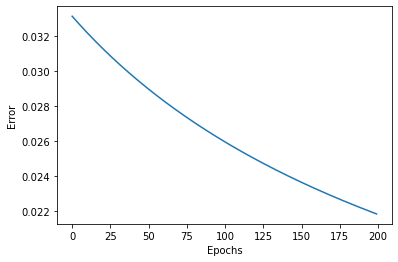

In [88]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(errs)

In [89]:
def calculate_output(instance):
    hidden_layer = sigmoid(np.dot(instance, weights0))
    output_layer = sigmoid(np.dot(hidden_layer, weights1))
    return output_layer[0]

In [90]:
calculate_output(input_layer[0])

0.015183235653226348

In [91]:
calculate_output(input_layer[99])

0.9807735533990718